In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv('C:\\Users\\Asus\\Downloads\\train_data.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# preparing data

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_train['Item_Weight'].mode()

0    12.15
dtype: float64

In [8]:
df_train['Item_Weight'].fillna(12.15,inplace=True)

In [9]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [10]:
df_train['Outlet_Size'].fillna('Medium',inplace=True)

In [11]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
# EDA

In [13]:
# CATEGORICAL COLUMNS

<AxesSubplot:>

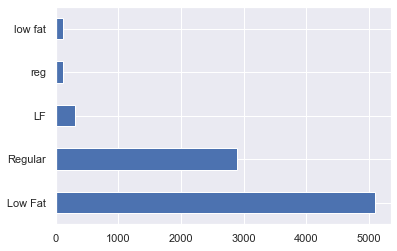

In [14]:
df_train['Item_Fat_Content'].value_counts().plot(kind='barh')
# map low fat,LF,reg into Regular and Low fat

<AxesSubplot:ylabel='Item_Fat_Content'>

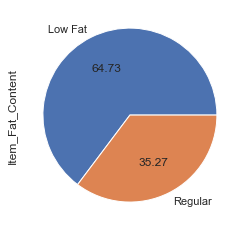

In [15]:
df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)
df_train['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%0.2f')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


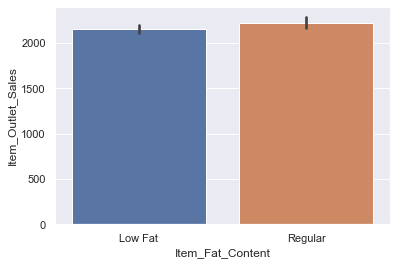

In [44]:
sns.barplot(df_train['Item_Fat_Content'],df_train['Item_Outlet_Sales'])
plt.show()
# regular fat content item sold more

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


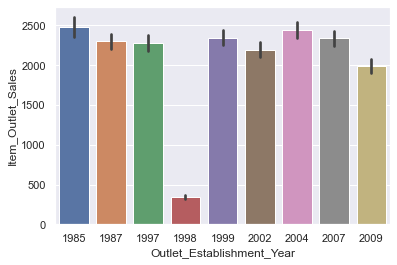

In [49]:
sns.barplot(df_train['Outlet_Establishment_Year'],df_train['Item_Outlet_Sales'])
plt.show()
# more sales on store which established in 1985 

In [18]:
# older the store more the sale

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


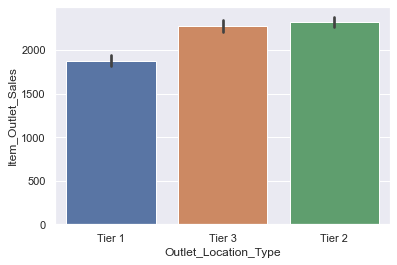

In [50]:
sns.barplot(df_train['Outlet_Location_Type'],df_train['Item_Outlet_Sales'])
plt.show()
# outlet which are in tier location,produce more sales 

<AxesSubplot:>

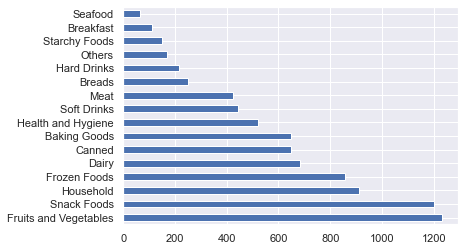

In [20]:
df_train['Item_Type'].value_counts().plot(kind='barh')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


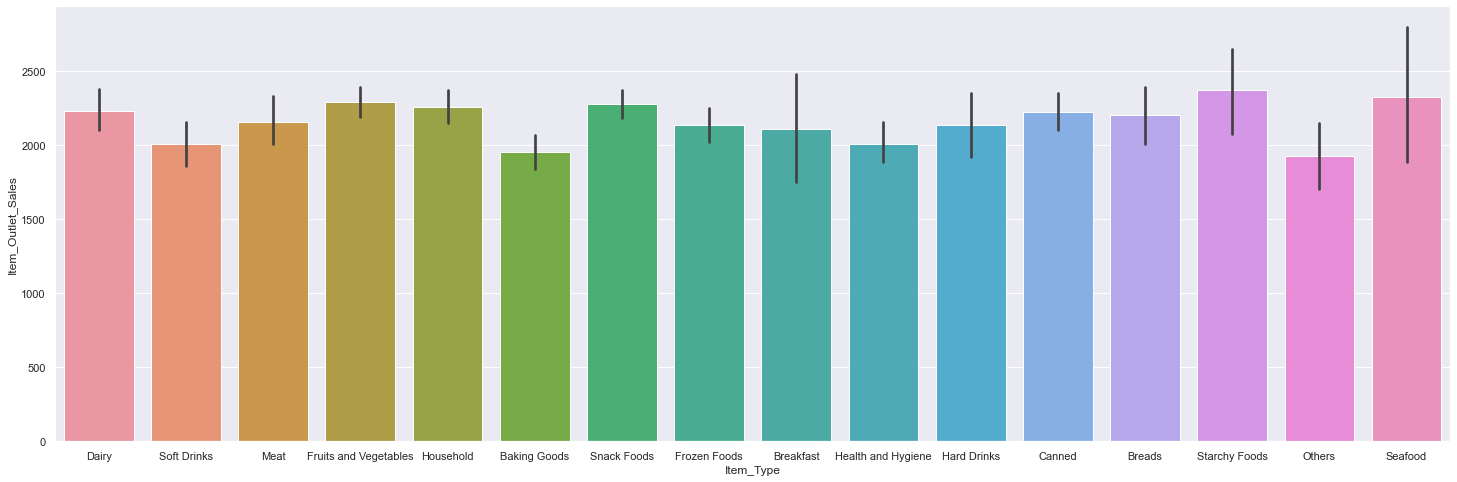

In [21]:
plt.figure(figsize=(25,8))
sns.barplot(df_train['Item_Type'],df_train['Item_Outlet_Sales'])
plt.show()

<AxesSubplot:ylabel='Outlet_Size'>

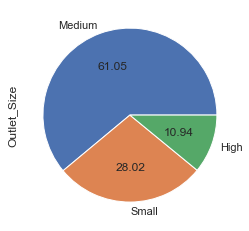

In [22]:
df_train['Outlet_Size'].value_counts().plot(kind='pie',autopct='%0.2f')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


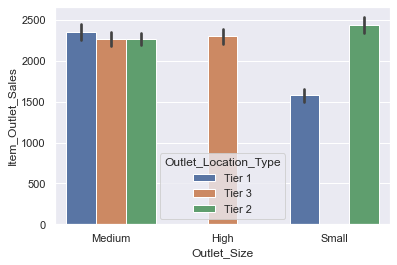

In [23]:
sns.barplot(df_train['Outlet_Size'],df_train['Item_Outlet_Sales'],hue=df_train['Outlet_Location_Type'])
plt.show()

In [24]:
df_train.corr()['Item_Outlet_Sales']

Item_Weight                  0.006443
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

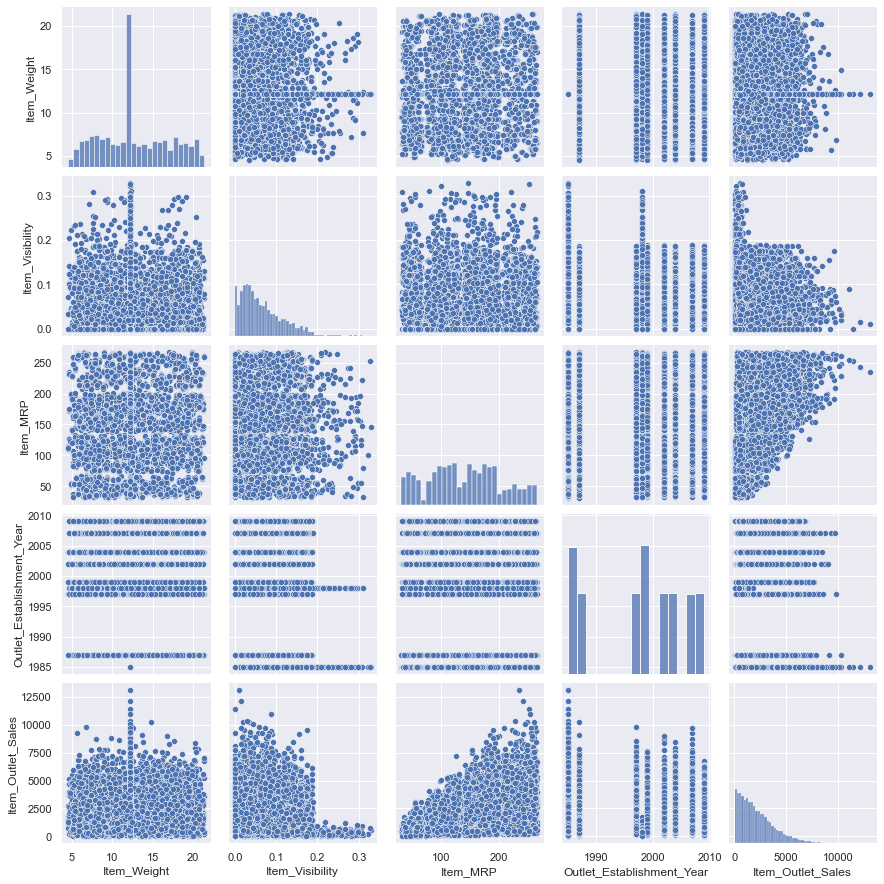

In [25]:
sns.pairplot(df_train)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


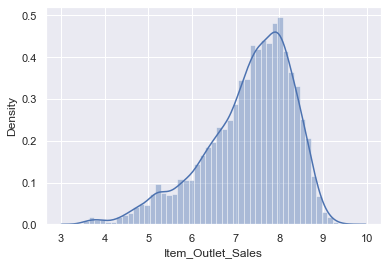

In [26]:
sns.distplot(np.log(df_train['Item_Outlet_Sales']))
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


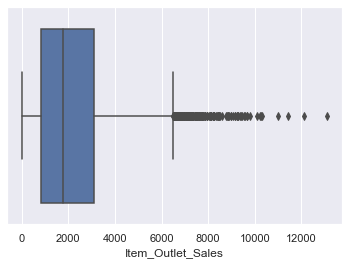

In [27]:
sns.boxplot(df_train['Item_Outlet_Sales'])
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


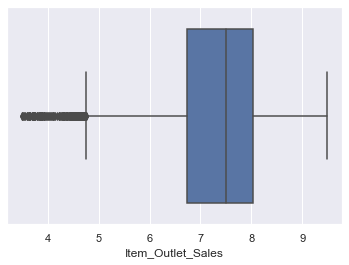

In [28]:
sns.boxplot(np.log(df_train['Item_Outlet_Sales']))
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [30]:
x = df_train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y = np.log(df_train['Item_Outlet_Sales'])

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8)

In [32]:
step1 = ColumnTransformer([
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['Item_Type']),
    ('tnf2',OrdinalEncoder(),['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
],remainder='passthrough')

In [33]:
step2 = RandomForestRegressor()

In [34]:
pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2)
])

In [35]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Item_Type']),
                                                 ('tnf2', OrdinalEncoder(),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('Step2', RandomForestRegressor())])

In [36]:
y_pred=pipe.predict(x_test)

In [37]:
r2_score(y_test,y_pred)

0.7274277638242088

In [38]:
step1 = ColumnTransformer([
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['Item_Type']),
    ('tnf2',OrdinalEncoder(),['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
],remainder='passthrough')

step3 = LinearRegression()

In [39]:
pipe2 = Pipeline([
    ('Step1',step1),
    ('Step3',step3)
])

In [40]:
 pipe2.fit(x_train,y_train)

Pipeline(steps=[('Step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Item_Type']),
                                                 ('tnf2', OrdinalEncoder(),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('Step3', LinearRegression())])

In [41]:
y_pred=pipe2.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

0.613862590094205

# random forest gives more accuracy

In [63]:
df_test = pd.read_csv('C:\\Users\\Asus\\Downloads\\test_data.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [65]:
# there are missinig values in  Item_Weight and  Outlet_Size 

In [66]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [67]:
df_test['Outlet_Size'].mode()

0    Medium
dtype: object

In [68]:
df_test['Item_Weight'].mode()

0    10.5
dtype: float64

In [69]:
df_test['Outlet_Size'].fillna('Medium',inplace =True)

In [70]:
df_test['Item_Weight'].fillna(10.5,inplace =True)

In [71]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [73]:
df_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3071,FDX14,13.10,Low Fat,0.074878,Dairy,76.6354,OUT013,1987,High,Tier 3,Supermarket Type1
5303,FDR47,10.50,LF,0.153146,Breads,194.2794,OUT019,1985,Small,Tier 1,Grocery Store
2376,DRJ25,10.50,Low Fat,0.149838,Soft Drinks,49.3692,OUT027,1985,Medium,Tier 3,Supermarket Type3
2505,FDT22,10.50,Low Fat,0.196268,Snack Foods,60.4220,OUT019,1985,Small,Tier 1,Grocery Store
1209,DRD27,18.75,Low Fat,0.023835,Dairy,99.1042,OUT035,2004,Small,Tier 2,Supermarket Type1


<AxesSubplot:>

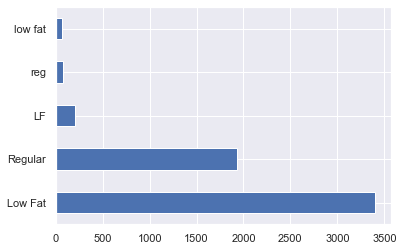

In [74]:
df_test['Item_Fat_Content'].value_counts().plot(kind='barh')

In [76]:
df_test['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

<AxesSubplot:>

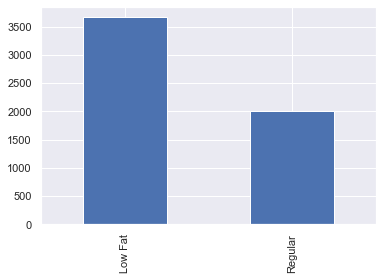

In [77]:
df_test['Item_Fat_Content'].value_counts().plot(kind='bar')

In [80]:
df=df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [85]:
pipe.predict(df)

array([7.23048682, 7.16592628, 6.26363745, ..., 7.5041889 , 8.1910773 ,
       7.41171346])